<a href="https://colab.research.google.com/github/MSURENDRAN/ADVANCE_MACHINE_LEARNING_LAB/blob/main/2348527_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer, load_iris, load_diabetes

In [ ]:
# Loading Breast Cancer dataset
breast_cancer_data = load_breast_cancer()
breast_cancer_features = breast_cancer_data.data
breast_cancer_target = breast_cancer_data.target

# Loading Iris dataset
iris_data = load_iris()
iris_features = iris_data.data
iris_target = iris_data.target

# Loading Diabetes dataset
diabetes_data = load_diabetes()
diabetes_features = diabetes_data.data
diabetes_target = diabetes_data.target


In [ ]:
print("Breast Cancer Dataset:")
print("Features shape:", breast_cancer_data.data.shape)
print("Target shape:", breast_cancer_data.target.shape)
print("Class names:", breast_cancer_data.target_names)

print("\nIris Dataset:")
print("Features shape:", iris_data.data.shape)
print("Target shape:", iris_data.target.shape)
print("Class names:", iris_data.target_names)

print("\nDiabetes Dataset:")
print("Features shape:", diabetes_data.data.shape)
print("Target shape:", diabetes_data.target.shape)

Breast Cancer Dataset:
Features shape: (569, 30)
Target shape: (569,)
Class names: ['malignant' 'benign']

Iris Dataset:
Features shape: (150, 4)
Target shape: (150,)
Class names: ['setosa' 'versicolor' 'virginica']

Diabetes Dataset:
Features shape: (442, 10)
Target shape: (442,)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_breast_cancer = PCA(n_components=2)
breast_cancer_pca = pca_breast_cancer.fit_transform(breast_cancer_features)
# Apply PCA to Breast Cancer dataset

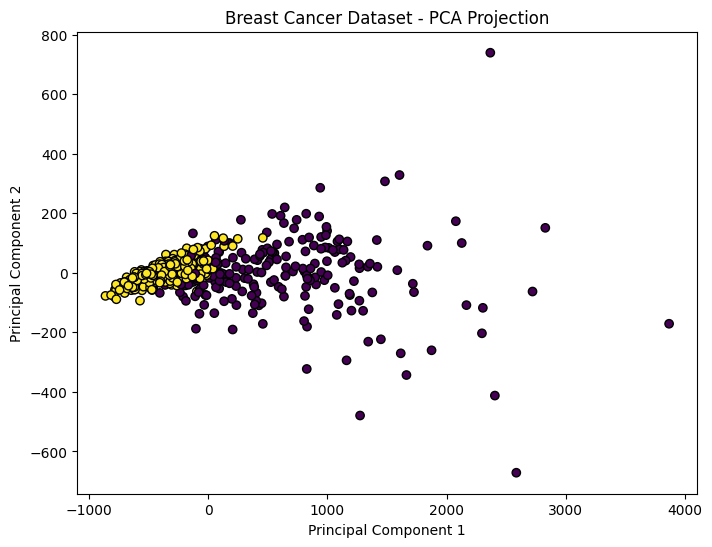

In [ ]:
# Plot PCA results for Breast Cancer dataset
plt.figure(figsize=(8, 6))
plt.scatter(breast_cancer_pca[:, 0], breast_cancer_pca[:, 1], c=breast_cancer_target, cmap='viridis', edgecolor='k')
plt.title('Breast Cancer Dataset - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Apply PCA to Iris dataset
pca_iris = PCA(n_components=2)
iris_pca = pca_iris.fit_transform(iris_features)

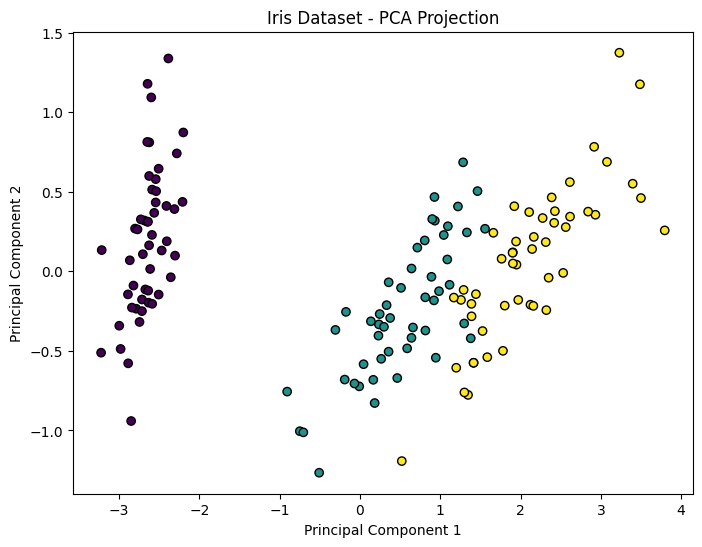

In [ ]:
# Plot PCA results for Iris dataset
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_target, cmap='viridis', edgecolor='k')
plt.title('Iris Dataset - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Apply PCA to Diabetes dataset
pca_diabetes = PCA(n_components=2)
diabetes_pca = pca_diabetes.fit_transform(diabetes_features)

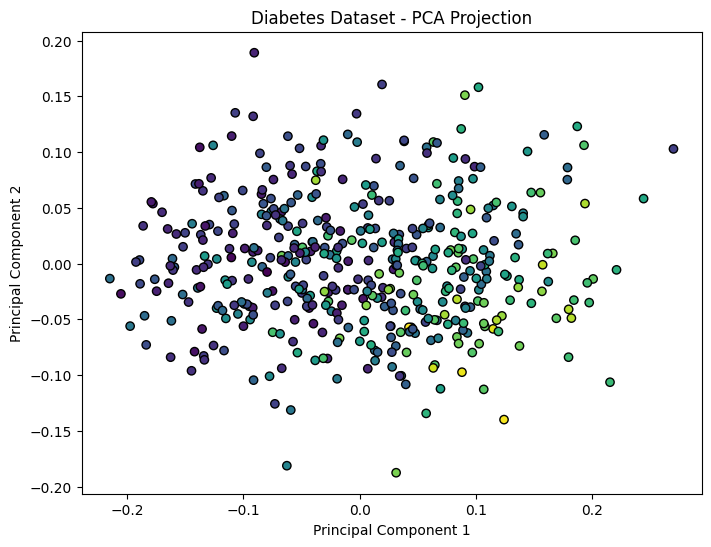

In [ ]:
# Plot PCA results for Diabetes dataset
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_pca[:, 0], diabetes_pca[:, 1], c=diabetes_target, cmap='viridis', edgecolor='k')
plt.title('Diabetes Dataset - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Function to print variance explained by each principal component
def print_variance_explained(pca, dataset_name):
    print(f"\nVariance explained by each principal component in {dataset_name} dataset:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f"Principal Component {i + 1}: {var:.4f}")

In [ ]:
# Print variance explained for Breast Cancer dataset
print_variance_explained(pca_breast_cancer, "Breast Cancer")


Variance explained by each principal component in Breast Cancer dataset:
Principal Component 1: 0.9820
Principal Component 2: 0.0162


In [ ]:
# Print variance explained for Iris dataset
print_variance_explained(pca_iris, "Iris")


Variance explained by each principal component in Iris dataset:
Principal Component 1: 0.9246
Principal Component 2: 0.0531


In [ ]:
# Print variance explained for Diabetes dataset
print_variance_explained(pca_diabetes, "Diabetes")


Variance explained by each principal component in Diabetes dataset:
Principal Component 1: 0.4024
Principal Component 2: 0.1492


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Function to apply LDA, train classifiers, and print results
def apply_lda_and_classifiers(features, target, dataset_name):
    # Determine the maximum number of components for LDA
    max_components = min(features.shape[1], len(set(target)) - 1)

    # Apply LDA for dimensionality reduction
    lda = LinearDiscriminantAnalysis(n_components=min(2, max_components))
    features_lda = lda.fit_transform(features, target)

    # Split the data into training and testing sets
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize classifiers
    knn_classifier = KNeighborsClassifier()
    decision_tree_classifier = DecisionTreeClassifier(random_state=42)
    random_forest_classifier = RandomForestClassifier(random_state=42)

    # Train and evaluate classifiers on original data
    print(f"\nResults for {dataset_name} - Original Data:")
    for classifier, name in [(knn_classifier, 'k-Nearest Neighbors'), (decision_tree_classifier, 'Decision Tree'), (random_forest_classifier, 'Random Forest')]:
        classifier.fit(features_train, target_train)
        predictions = classifier.predict(features_test)
        accuracy = accuracy_score(target_test, predictions)
        print(f"{name}: Accuracy = {accuracy:.4f}")

    # Train and evaluate classifiers on reduced data
    print(f"\nResults for {dataset_name} - Reduced Data (after LDA):")
    for classifier, name in [(knn_classifier, 'k-Nearest Neighbors'), (decision_tree_classifier, 'Decision Tree'), (random_forest_classifier, 'Random Forest')]:
        classifier.fit(features_lda, target)
        features_test_lda = lda.transform(features_test)
        predictions = classifier.predict(features_test_lda)
        accuracy = accuracy_score(target_test, predictions)
        print(f"{name}: Accuracy = {accuracy:.4f}")

In [ ]:
# Apply LDA and classifiers for Breast Cancer dataset
apply_lda_and_classifiers(breast_cancer_features, breast_cancer_target, "Breast Cancer")


Results for Breast Cancer - Original Data:
k-Nearest Neighbors: Accuracy = 0.9561
Decision Tree: Accuracy = 0.9474
Random Forest: Accuracy = 0.9649

Results for Breast Cancer - Reduced Data (after LDA):
k-Nearest Neighbors: Accuracy = 0.9737
Decision Tree: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000


In [ ]:
# Apply LDA and classifiers for Iris dataset
apply_lda_and_classifiers(iris_features, iris_target, "Iris")


Results for Iris - Original Data:
k-Nearest Neighbors: Accuracy = 1.0000
Decision Tree: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000

Results for Iris - Reduced Data (after LDA):
k-Nearest Neighbors: Accuracy = 1.0000
Decision Tree: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000


In [ ]:
# Apply LDA and classifiers for Diabetes dataset
apply_lda_and_classifiers(diabetes_features, diabetes_target, "Diabetes")


Results for Diabetes - Original Data:
k-Nearest Neighbors: Accuracy = 0.0000
Decision Tree: Accuracy = 0.0000
Random Forest: Accuracy = 0.0000

Results for Diabetes - Reduced Data (after LDA):
k-Nearest Neighbors: Accuracy = 0.1685
Decision Tree: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000
